This is just a quick demo showing how a Fisher's method transforms isolated significant $p$-values into bands significant $p$-values.
A Fisher's method context of $3$, like we use, causes bands of width $7$.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import combine_pvalues
import matplotlib.pyplot as plt

Here are some fake pre-Fisher's-method $p$-values.

$p=1$ everywhere except for nucleotide $10$.
At that one nucleotide, we have $p=0.0001$.

In [2]:
pos_array = np.arange(20) # ten nucleotide positions

# place one significant pvalue at nucleotide position 10
pval_array = np.ones_like(pos_array, dtype=float)
pval_array[10] = 10**(-4)

print('pos_array: (nucleotide positions)')
print(pos_array)
print('')
print('pval_array: (pre-Fisher\'s method p-values)')
print(pval_array)

pos_array: (nucleotide positions)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

pval_array: (pre-Fisher's method p-values)
[1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00
 1.e-04 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00 1.e+00]


The next cell applies Fisher's method.

In [3]:
fisher_window_radius = 3 # combine pvals over +/- 3 bp range, like we do

before_fisher = pd.Series(pval_array,
                          name='$p$-values before Fisher\'s method')

# Split into windows of width 2*fisher_window_radius + 1, then combine p-values
# over each window using Fisher's method.
after_fisher = (
    before_fisher
    .rolling(2*fisher_window_radius + 1, center=True)
    .apply(lambda x: combine_pvalues(x, method='fisher')[1])
    .rename('$p$-values after Fisher\'s method')
)

A graph of the $p$-values before and after Fisher's method shows that the singular $p$-value turned into a band of width $7$.

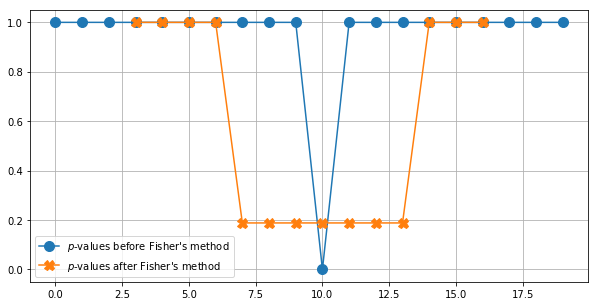

In [4]:
plt.figure(figsize=(10,5))
plt.plot(pos_array, before_fisher, marker='o', markersize=10)
plt.plot(pos_array, after_fisher, marker='X', markersize=10)
# plt.yscale('log') # tuncomment for log-scale
plt.grid(True)
plt.legend()
plt.show()